In [1]:
from angle_screening import Angle_Screening
from correlation_functions import fast_tcf_self, fast_tcf_
from utilities import *
import warnings
warnings.filterwarnings("ignore")
import MDAnalysis as mda

First the function Angle_Screening is imported from the functions.py script.
The function takes 
1) a trajectory u, that should be loaded using MDAnalysis.
    Example:
    import MDAnalysis as mda
    Load trajectory file
    # u = mda.Universe('trajectory_water_and_ions.xtc', 'system_water_and_ions.gro')
2) A selection string for 
    a) A triplet correlation function between same atoms in which atom_name_2 = None
    b) A triplet correlation function between two different atoms, in which atom_name_1 should be the selection string for the central atom and 
        atom_name_2 for the (two) non central atoms
3) The range to perfrom the angle screening with the step size for the increments
4) The stride for loading the frames of the trajectory

For more information on loading the trajectory data with MDAnalysis and selections string, please refer to the original documentation:
https://docs.mdanalysis.org/stable/index.html 

## Notice
# In this tutorial, the sample simulation data will be used
# The simulation data consists of water molecules and a single NaCl ion pair
# For more information on the simulation, refer to the description.txt file

In [2]:
gro_file = os.getcwd() + "/simulation_data_example/sample.gro"
trr_file = os.getcwd() + "/simulation_data_example/sample.xtc"
u  = mda.Universe(gro_file, trr_file,dtype='float64')
print("Trajectory with {} frames".format(u.trajectory.n_frames))

Trajectory with 51 frames


# Example 1:
Triplet correlation function of a triple of same atom type "Oxygen" with selection 
string "name O" with an angle of 60 (equilateral configuration)
g(r,r,r), 
Plot=True, while provide a binned plot of the correlation function
chunk = 20, selects only 20% of the same type atoms

Frames: 100%|██████████| 2/2 [00:05<00:00,  2.54s/it]


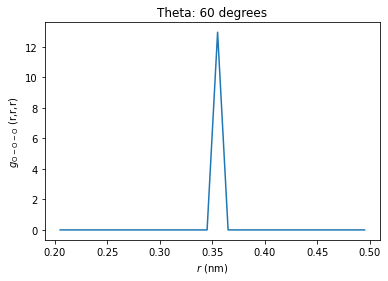

In [3]:
valid_distances_A_A, valid_angles_A_A  = fast_tcf_self(u,
                                                        "name O", 
                                                        stride =50, 
                                                        theta = 60, 
                                                        plot=True, 
                                                        demo=False,
                                                        chunk=20)

# Example 2:
Triplet correlation function of a triple of same atom type "A" with selection string "name A" with an angle of 109 (isoceles configuration)
g(r,r,s), 
Plot=True, while provide a binned plot of the correlation function

Frames: 100%|██████████| 2/2 [00:04<00:00,  2.46s/it]


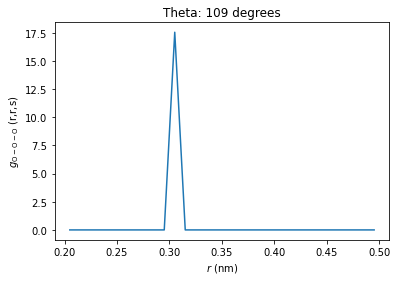

In [4]:
valid_distances_A_A, valid_angles_A_A  = fast_tcf_self(u,
                                                        "name O",
                                                        stride =50,
                                                        theta = 109, 
                                                        plot=True, 
                                                        demo = False,
                                                        chunk = 20)

# Example 3:
Triplet correlation function of a triple of different atom types "Na"  and "O"
 with selection string "name Na" and "name O" and an angle of 60 (equilateral configuration)
g(r,r,r), 
Plot=True, while provide a binned plot of the correlation function
chunk_solvent = 50, selects only 50% of the solvent atoms (second selection string)

Solvent array length: 1
total array length: 301


Frames: 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]


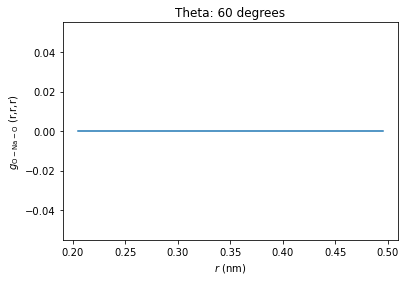

In [5]:
valid_distances_A_B, valid_angles_A_B  = fast_tcf_(u, 
                                                   "name Na", 
                                                   "name O", 
                                                   stride =50, 
                                                   theta = 60, 
                                                   plot=True,
                                                   demo = False,
                                                   chunk = 100,
                                                   chunk_solvent=30)

# Example 4:
Angle screening (theta)
Triplet correlation function of a triple of same atom type "O" with selection string "name O" 
g(r,r,r), 
Plot=True, while provide a binned plot of the correlation function

First plot is a 1D histogram of each angle in the angle screen array  plotted on 3D plot.

Second plot is a mesh uniting all the 1D histograms in figure 1

Third plot is a histogram of all the angles (2D histogram)

Frames: 100%|██████████| 2/2 [00:05<00:00,  2.55s/it]


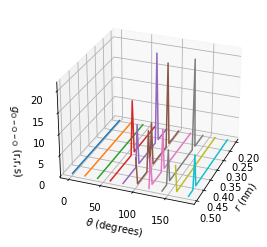

<Figure size 432x288 with 0 Axes>

In [6]:
plots_alfa = Angle_Screening(u,
                         atom_name_1 = "name O", 
                         atom_name_2 =None, 
                         angle_range = [0, 180], 
                         angle_step = 20, 
                         stride = 50,
                         plot_individual= False,
                         demo_flag = False,
                         chunk_size = 20,
                         chunk_solvent_size = 50)

![Figure](figure1.png)

![Figure](figure2.png)